In [2]:
HOME = "/data/git/shopee-product-matching"

import pandas as pd

import sys
sys.path.append(f"{HOME}/src")

import vmdl

In [3]:
p_prp = f'{HOME}/output/prep002'
pdata = f'{HOME}/input/shopee-product-matching'

df = pd.read_csv(f'{p_prp}/df_valid.csv')
pids = df.posting_id.values

p_imgs = f"{pdata}/train_images"


In [4]:
feats = vmdl.mk_feats(df, p_imgs, mdl='efficientnet-b1')

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b1-f1951068.pth" to /home/ubuntu/.cache/torch/hub/checkpoints/efficientnet-b1-f1951068.pth


  0%|          | 0.00/30.1M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b1


In [5]:
feats.shape

(5135, 1280)

In [6]:
import torch
import numpy as np
from tqdm import tqdm

from utils import meanf1, get_targets, get_preds_by_thrsh, preds2pids
from neighbor import get_nbrs

In [7]:
targets = get_targets(df)

In [8]:
dists, idx = get_nbrs(feats)

chunk 0 to 4096
chunk 4096 to 5135


In [19]:
preds = get_preds_by_thrsh(dists, idx, thrsh=.5)
preds = preds2pids(preds, pids)

In [20]:
meanf1(preds,targets)

0.28066828209896677

In [27]:
thrshes = np.linspace(.2,.3,num=11)
print(thrshes)

[0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3 ]


In [28]:
f1_lst = []
for thrsh in tqdm(thrshes):
    preds = get_preds_by_thrsh(dists, idx, thrsh)
    preds = preds2pids(preds, pids)
    f1_lst.append(meanf1(preds,targets))

100%|██████████| 11/11 [00:01<00:00,  6.34it/s]


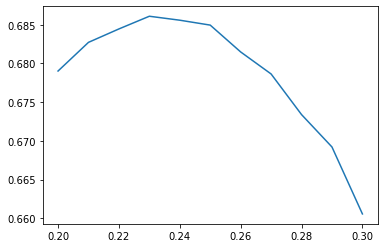

In [29]:
import matplotlib.pyplot as plt
plt.plot(thrshes, f1_lst)  

In [30]:
def find_best(dists, idx, thrshes = np.linspace(1.75,2.25,num=11)):
    f1_lst = []
    preds_lst = []
    for thrsh in tqdm(thrshes):
        preds = get_preds_by_thrsh(dists, idx, thrsh)
        preds = preds2pids(preds, pids)
        preds_lst.append(preds)
        f1 = meanf1(preds,targets)
        f1_lst.append(f1)
    f1_best, thrsh_best, preds_best = sorted(zip(f1_lst, thrshes, preds_lst), reverse=True)[0]
    return f1_best, thrsh_best, preds_best

In [31]:
f1_best, thrsh_best, preds_best = find_best(dists, idx, thrshes)

100%|██████████| 11/11 [00:01<00:00,  6.41it/s]


In [32]:
f1_best, thrsh_best

(0.6860950986121528, 0.23)